Integrantes:
*   Gabriel Bianchi e Silva - RA: 140399
*   Miguel Silva Taciano - RA: 140756

Nesse projeto será denvolvida uma simulação de um lançamento obliquio de um projétil, buscando representar suas posições em X e Y, velocidades e energia cínetica e potencial por meio de representações gráficas. Na simulação será considerado também que o choque com o solo é completamente elástico.

Parâmetros:

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.matrixlib import defmatrix

dT = 0.01
tempoMax = 20
v0 = 30
x0 = 0
y0 = 0
k = 0.5
m = 2
theta = 60
g = -9.81
x = [x0]
y = [y0]
vx = [v0 * math.cos(math.radians(theta))]
vy = [v0 * math.sin(math.radians(theta))]
v = [v0]
fat = [-k * v0]
T = [dT]
ec = [(m * v0 ** 2) / 2]
pg = [m * abs(g) * y0]

Os parâmetros apresentados levam em consideração valores definidos pelos integrantes do grupo, de maneira a obter representações gráficas visualmente melhores, como a velocidade e as posições iniciais, entre outros. Uma vez com esses valores já determinados, os parâmetros que dependem deles podem ser incializados também, como as componentes da velocidade no eixo X e Y.

Para a implementação, como não podemos analisar o comportamento em um espaço infinito, levamos em consideração um intervalo de tempo T = 20, dividido em intervalos menores dT, de 0.01, como no modelo de Euler.

In [ ]:
for i in np.arange(dT, tempoMax, dT):
    # Parâmetro para realizar o append
    t = int(round(i * 100))
    # Cáculo das velocidades decompostas
    dVX = (-(k / m) * vx[t - 1]) * dT
    dVY = (g - (k / m) * vy[t - 1]) * dT

    # Energia Mecânica inicial
    Em = ec[0] + pg[0]

    # Cálculo da variação da posição em X e Y
    dX = vx[t - 1] * dT
    dY = vy[t - 1] * dT

    # Cálculo da variação da Potencial Gravitacional
    dPG = m * abs(g) * dY

    # Atualizando as listas:

    vx.append(vx[t - 1] + dVX)
    x.append(x[t - 1] + dX)
    if (y[t - 1] + dY) > 0: # Para o caso do Choque completamente elástico
      y.append(y[t - 1] + dY)
      vy.append(vy[t - 1] + dVY)
    else:
      y.append(0)
      vy.append(-vy[t - 1] + dVY)
    
    # Cálculo da velocidade atual para a Energia Cinética
    vAtual = math.sqrt((vx[t]) ** 2 + (vy[t]) ** 2)
    v.append(vAtual)

    fatAtual = -(k * v[t])
    fat.append(fatAtual)

    ec.append((m * v[t]**2)/2)
    # fat.append(fat[t - 1] + dF)
    T.append(T[t - 1] + dT)
    pg.append(pg[t - 1] + dPG)

A implementação, como mencionado anteriormente, leva em consideração o choque completamente elástico com o solo, ou seja, quando o projétil atinge o solo, ele não perde energia para o mesmo, e sim apenas para o atrito.
Dentro do laço de repetição "for", foram calculadas as variações em seus respectivos instantes, de cada força e posição no sistema. Posteriormente essas variações foram adicionadas às listas correspontentes, de forma a podermos representar tais variações durante o tempo pré determinado.

O gráfico a seguir demonstra o deslocamento de X por Y, e, como esperado do comportamento de um choque completamente elástico, sua velocidade em Y é invertida, demonstrando o comportamento de "quicar".

Text(0, 0.5, 'Deslocamento Vertical (m)')

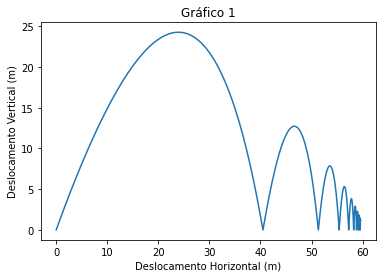

In [ ]:
plt.plot(x, y)
plt.title("Gráfico 1")
plt.xlabel("Deslocamento Horizontal (m)")
plt.ylabel("Deslocamento Vertical (m)")

O gráfico abaixo representa o deslocamento em X pelo tempo, e, como esperado, ele para de aumentar após um determinado instante, quando vai perdendo sua enrgia para o atrito

Text(0, 0.5, 'Deslocamento Horizontal (m)')

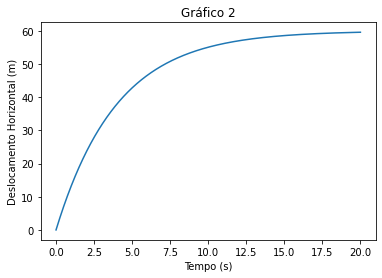

In [ ]:
plt.plot(T, x)
plt.title("Gráfico 2")
plt.xlabel("Tempo (s)")
plt.ylabel("Deslocamento Horizontal (m)")

No gráfico abaixo é posível vizualizar o efeito causado pela colisão totalmente elástica, onde sempre que a posição em Y é 0, ele volta a subir.

Text(0, 0.5, 'Deslocamento Vertical (m)')

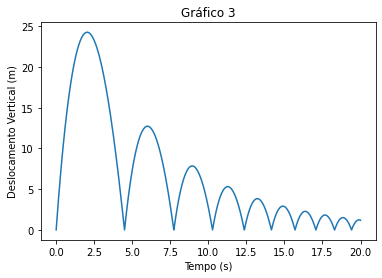

In [ ]:
plt.plot(T, y)
plt.title("Gráfico 3")
plt.xlabel("Tempo (s)")
plt.ylabel("Deslocamento Vertical (m)")

Este gráfico mostra a velociade(geral) em função do tempo, e pode-se vizualizar que ela, após atingir um valor baixo, volta a subir, por se tratar de uma colisão totalmente elástica, porém, ela sobe menos, por conta do atrito.

Text(0, 0.5, 'Velocidade (m/s)')

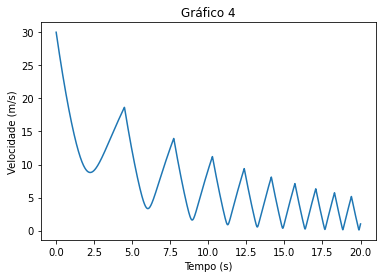

In [ ]:
plt.plot(T, v)
plt.title("Gráfico 4")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")

Agora, na representação da velociade em X pelo tempo, a velociade decai de maneira exponencial, até atingir valores muito próximos a 0.

Text(0, 0.5, 'Velocidade Horizontal (m/s)')

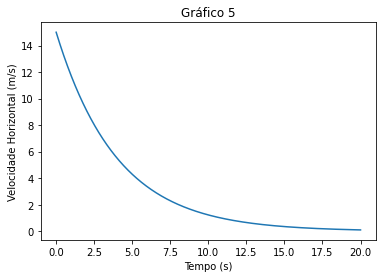

In [ ]:
plt.plot(T, vx)
plt.title("Gráfico 5")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade Horizontal (m/s)")

Já na componente em Y, podemos perceber de maneira clara quando o projétil atinge o chão, representado pela inversão da velocidade, e, além disso, em tempos grandes podemos ver que a velocidade também vai se "estabilizando" até chegar em 0.

Text(0, 0.5, 'Velocidade Vertical (m/s)')

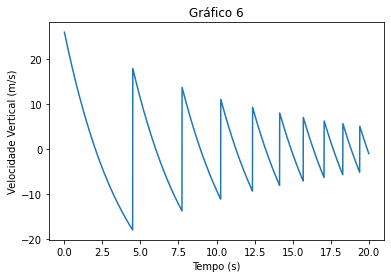

In [ ]:
plt.plot(T, vy)
plt.title("Gráfico 6")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade Vertical (m/s)")

Quanto à força de atrito, podemos ver que seu comportamento é de aumentar sempre que o movimento é "para baixo", e diminuir quando sobe, até atingir o valor de 0, quando o sistema parasse.

Text(0, 0.5, 'Força de Atrito (N)')

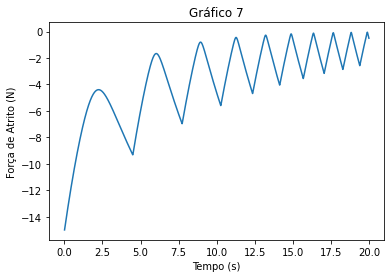

In [ ]:
plt.plot(T, fat)
plt.title("Gráfico 7")
plt.xlabel("Tempo (s)")
plt.ylabel("Força de Atrito (N)")

Começando as energias, temos o gráfico da energia cinética pelo tempo, que começa grande, por ter a velocidade máxima, e vai diminuindo até que o projétil atinja a altura máxima, e passa a aumetar novamente, quando o objeto volta a cair.

Text(0, 0.5, 'Energia Cinética (J)')

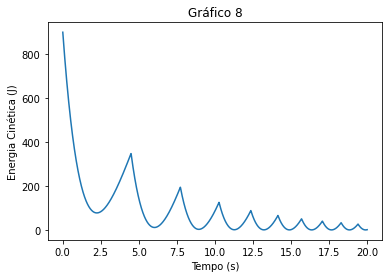

In [ ]:
plt.plot(T, ec)
plt.title("Gráfico 8")
plt.xlabel("Tempo (s)")
plt.ylabel("Energia Cinética (J)")

E, por fim, a energia potencial gravitacional, por depender da altura(deslocamento vertical), seu gráfico é muito semelhante ao de Y pelo tempo, onde a energia será máxima quando o Y for máximo, e 0 quando Y for também 0.

Text(0, 0.5, 'Energia Potencial Gravitacional (J)')

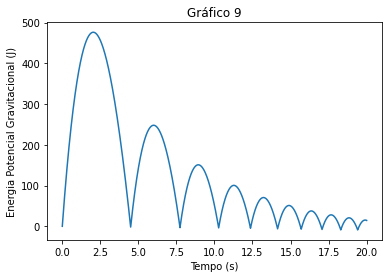

In [ ]:
plt.plot(T, pg)
plt.title("Gráfico 9")
plt.xlabel("Tempo (s)")
plt.ylabel("Energia Potencial Gravitacional (J)")

A energia dissipada, no final do trajeto do projétil, será toda a energia que o sistema possuía no começo do movimento, ou seja:

In [ ]:
print(str(Em) + ' J')

900.0 J
